In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')


In [7]:
df.shape

(22005, 30)

In [8]:
df_test.shape

(6000, 29)

In [10]:
df.isnull().sum()
df=df[df['Employee_type'].notna()]

In [11]:
df.isnull().sum()

job_level                                   0
job_duration_in_current_job_level           0
person_level                                0
job_duration_in_current_person_level        0
job_duration_in_current_branch              0
Employee_type                               0
Employee_status                             0
gender                                      0
age                                         0
marital_status_maried(Y/N)                  0
number_of_dependences                       0
number_of_dependences (male)                0
number_of_dependences (female)              0
Education_level                          3606
GPA                                      3501
year_graduated                           3501
job_duration_as_permanent_worker         2055
job_duration_from_training                  0
branch_rotation                             0
job_rotation                                0
assign_of_otherposition                     0
annual leave                      

In [119]:
df['achievement_target_3'] = df['achievement_target_3'].replace('not_reached','not reached')
df['achievement_target_2'] = df['achievement_target_2'].replace('Pencapaian < 50%','achiev_< 50%')
df['achievement_target_2'] = df['achievement_target_2'].replace("Pencapaian 50%-100%",'achiev_50%-100%')
df['achievement_target_2'] = df['achievement_target_2'].replace("Pencapaian 100%-150%",'achiev_100%-150%')
df['achievement_target_2'] = df['achievement_target_2'].replace("Pencapaian > 1.5",'achiev_> 1.5')
df['achievement_target_1'] = df['achievement_target_1'].replace('Pencapaian < 50%','achiev_< 50%')
df['achievement_target_1'] = df['achievement_target_1'].replace("Pencapaian 50%-100%",'achiev_50%-100%')
df['achievement_target_1'] = df['achievement_target_1'].replace("Pencapaian 100%-150%",'achiev_100%-150%')
df['achievement_target_1'] = df['achievement_target_1'].replace("Pencapaian > 1.5",'achiev_> 1.5')

In [98]:
df_test['achievement_target_3'] = df_test['achievement_target_3'].replace('not_reached','not reached')
df_test['achievement_target_2'] = df_test['achievement_target_2'].replace('Pencapaian < 50%','achiev_< 50%')
df_test['achievement_target_2'] = df_test['achievement_target_2'].replace("Pencapaian 50%-100%",'achiev_50%-100%')
df_test['achievement_target_2'] = df_test['achievement_target_2'].replace("Pencapaian 100%-150%",'achiev_100%-150%')
df_test['achievement_target_2'] = df_test['achievement_target_2'].replace("Pencapaian > 1.5",'achiev_> 1.5')
df_test['achievement_target_1'] = df_test['achievement_target_1'].replace('Pencapaian < 50%','achiev_< 50%')
df_test['achievement_target_1'] = df_test['achievement_target_1'].replace("Pencapaian 50%-100%",'achiev_50%-100%')
df_test['achievement_target_1'] = df_test['achievement_target_1'].replace("Pencapaian 100%-150%",'achiev_100%-150%')
df_test['achievement_target_1'] = df_test['achievement_target_1'].replace("Pencapaian > 1.5",'achiev_> 1.5')

<AxesSubplot:xlabel='achievement_target_1', ylabel='count'>

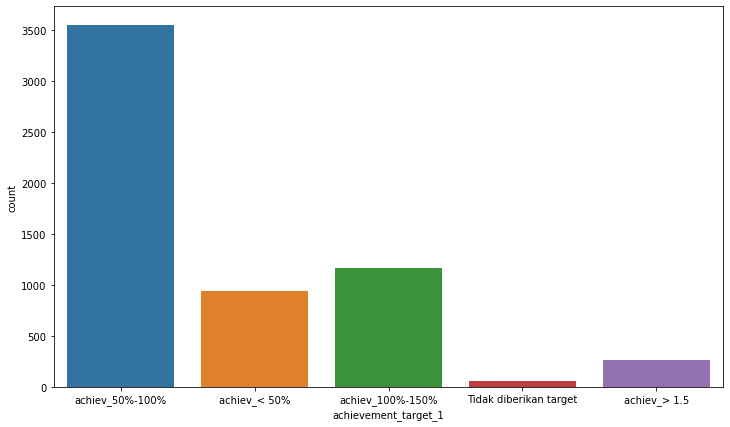

In [99]:
plt.figure(figsize=(12,7))
sns.countplot(df_test['achievement_target_1'])

<AxesSubplot:xlabel='achievement_target_1', ylabel='count'>

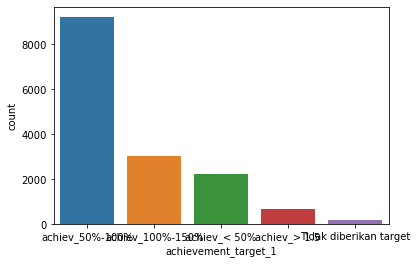

In [100]:
sns.countplot(df['achievement_target_1'])

In [101]:
obj_columns = df.select_dtypes(['object']).columns
df[obj_columns] = df[obj_columns].astype('category')
#merubah category menjadi int column
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x:x.cat.codes)

In [102]:
#encoding category value di df test
obj_columns = df_test.select_dtypes(['object']).columns
df_test[obj_columns] = df_test[obj_columns].astype('category')
#merubah category menjadi int column
cat_columns = df_test.select_dtypes(['category']).columns
df_test[cat_columns] = df_test[cat_columns].apply(lambda x:x.cat.codes)

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X = df_test.drop('achievement_target_1',axis=1)
y = df_test['achievement_target_1']

In [74]:
df_test.head()

,job_level,job_duration_in_current_job_level,person_level,job_duration_in_current_person_level,job_duration_in_current_branch,Employee_type,Employee_status,gender,age,marital_status_maried(Y/N),...,job_rotation,assign_of_otherposition,annual leave,sick_leaves,Avg_achievement_%,Last_achievement_%,Achievement_above_100%_during3quartal,achievement_target_1,achievement_target_2,achievement_target_3
0,2,1.42,4,1.42,0.5,2,0,0,1983,1,...,9,1,3,1,79.506667,94.17,1.0,6,7,2
1,1,1.58,2,1.58,2.0,0,0,1,1988,0,...,2,2,4,1,54.283333,42.97,0.0,2,2,2
2,1,1.83,2,1.83,1.5,0,0,1,1988,1,...,2,0,2,0,43.016667,44.28,0.0,6,7,2
3,2,8.00,5,5.00,1.5,0,0,1,1973,1,...,5,11,3,0,74.390000,80.93,0.0,1,2,0
4,1,1.92,2,1.92,0.5,0,0,0,1985,1,...,3,0,3,0,106.376667,109.09,3.0,1,3,2


In [104]:
from sklearn.preprocessing import MinMaxScaler
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train,y_train)
X_test = scaler.transform(X_test)

In [105]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

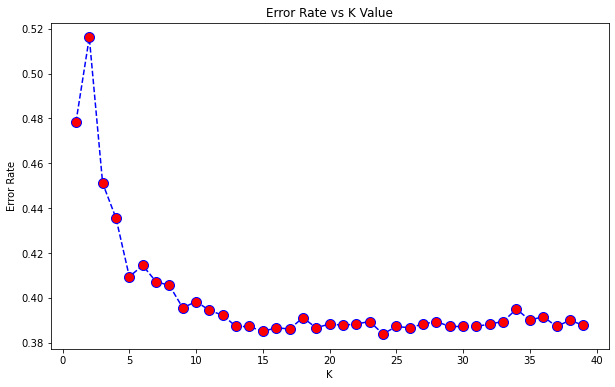

In [106]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [116]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_train,y_train)
pred_i = rf.predict(X_test)

In [117]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score
print(classification_report(y_test,pred_i))
print(confusion_matrix(y_test,pred_i))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.41      0.06      0.11       375
           2       0.64      0.94      0.76      1059
           3       0.72      0.53      0.61       275
           4       1.00      0.01      0.03        77

    accuracy                           0.65      1800
   macro avg       0.56      0.31      0.30      1800
weighted avg       0.62      0.65      0.57      1800

[[  0   0   8   6   0]
 [  0  24 345   6   0]
 [  0  25 993  41   0]
 [  0   1 129 145   0]
 [  0   9  65   2   1]]


In [134]:
#mengambil row yang kolom achievement_target_1nya null di dataframe train
df = df[df['achievement_target_1'].isnull()]
df = df.drop('achievement_target_1',axis=1)
obj_columns = df.select_dtypes(['object']).columns
df[obj_columns] = df[obj_columns].astype('category')
#merubah category menjadi int column
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x:x.cat.codes)
pred_at1 = rf.predict(df)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [163]:
# submit kelima
#score 0.52
submit_kelima = pd.read_csv('submit_kelima.csv')
submit_kelima[submit_kelima['Best Performance']==1].count()

Unnamed: 0          1593
Best Performance    1593
dtype: int64

In [164]:
submit_kelima[submit_kelima['Best Performance']==0].count()

Unnamed: 0          4407
Best Performance    4407
dtype: int64

In [165]:
#Submit keenam
#year_graduated di drop
#score gak tau
submit_keenam = pd.read_csv('submit_keenam.csv')
submit_keenam[submit_keenam['Best Performance']==1].count()

index               1658
Best Performance    1658
dtype: int64

In [166]:
submit_keenam[submit_keenam['Best Performance']==0].count()

index               4342
Best Performance    4342
dtype: int64

In [3]:
# submit ketuju
# year graduated diganti dengan most frequent
submit_ketuju = pd.read_csv("submit_ketuju.csv")
submit_ketuju[submit_ketuju['Best Performance']==1].count()


Unnamed: 0          1658
Best Performance    1658
dtype: int64

In [4]:
#submit kedelapan
#year graduated diganti denga yang paling menjurus. yang gk jelas diganti dengan most frequent
submit_kedelapan = pd.read_csv("submit_kedelapan.csv")
submit_kedelapan[submit_kedelapan['Best Performance']==1].count()

Unnamed: 0          4342
Best Performance    4342
dtype: int64

<AxesSubplot:xlabel='year_graduated', ylabel='count'>

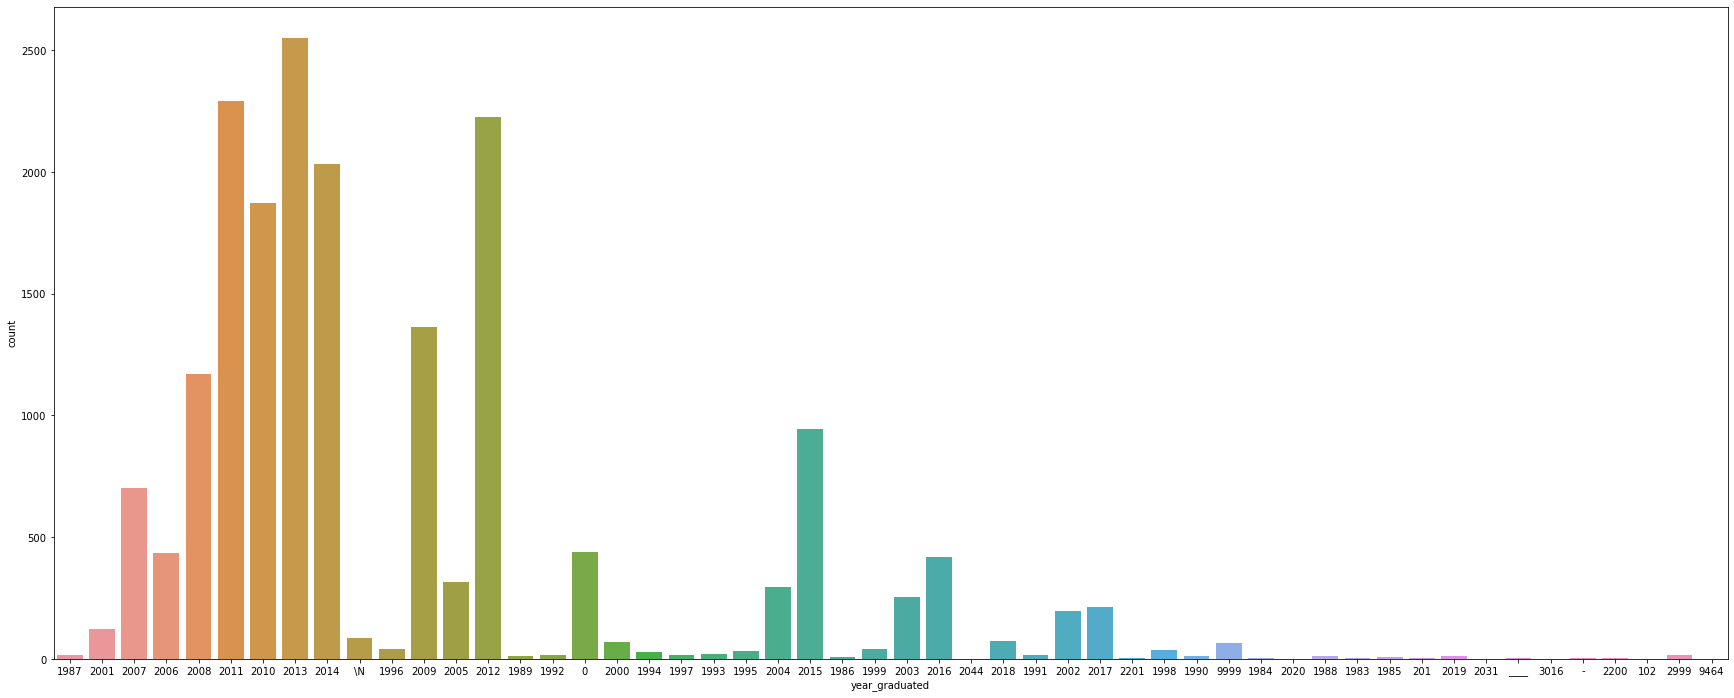

In [18]:
plt.figure(figsize=(30,12))
sns.countplot(df['year_graduated'])